# Assignment 1: Exploring and Visualizing Data  
Jason Adam
## Background Data  
The MSPA Software Survey was collected in December 2016. Data from the survey were used to inform data science curriculum planning. These data are provided in the comma-delimited text file <mspa-survey-data.csv>.  
## Management Questions  
Imagine that you are an academic administrator responsible for defining the future direction of the graduate program. The MSPA Survey has been designed with these objectives in mind:

1. Learn about current student software preferences.
2. Learn about student interest in potential new courses.
3. Guide software and systems planning for current and future courses.
4. Guide data science curriculum planning.

# Setup & Data Ingest  
Load necessary libraries and read in data.

### Colab Setup

In [0]:
# Mount google drive for easier file load
from google.colab import drive
drive.mount('/content/gdrive')

### Initial Imports

In [0]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Dataframe(s) Creation

In [0]:
# Read in the survey data
valid_survey_input = pd.read_csv('/content/gdrive/My Drive/northwestern/422-msds/422-colab/data-files/mspa-survey-data.csv')

# Exploratory Data Analysis (EDA)  
Data Cleaning  
Compute Summary Statistics  
Exploratory Visualizations

### Data Cleaning

In [0]:
# Reset index as column 'RespondentID'
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [0]:
# View first 5 rows of data
valid_survey_input.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [0]:
# View columns names
valid_survey_input.columns

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')

In [0]:
# Shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [0]:
# Define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

### Summary Statistics

In [0]:
# Identify the shape of the dataframe
df_shape = software_df.shape
print('The dataframe has {0} rows and {1} columns'.format(df_shape[0], df_shape[1]))

The dataframe has 207 rows and 15 columns


In [0]:
# Summary stats for consolidated df
software_df.describe()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


### Exploratory Visualizations

#### Correlation Heatmap

In [0]:
# Correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 576x396 with 0 Axes>

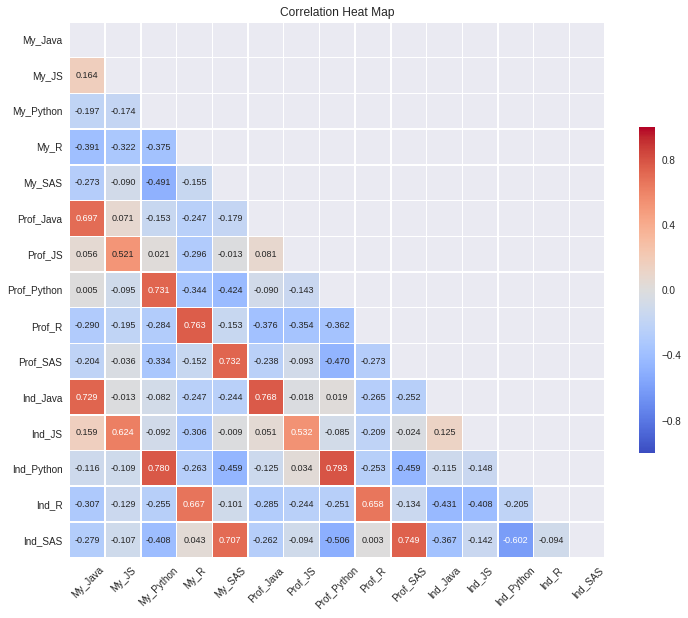

In [0]:
# Product Correlation heat map
corr_chart(df_corr = software_df)

#### R vs Python Scatterplot

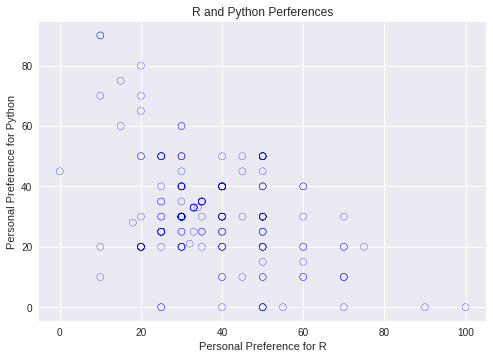

In [0]:
# Single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue')

#### Histograms of All Preference Fields

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52bf833c88>,
      dtype=object)

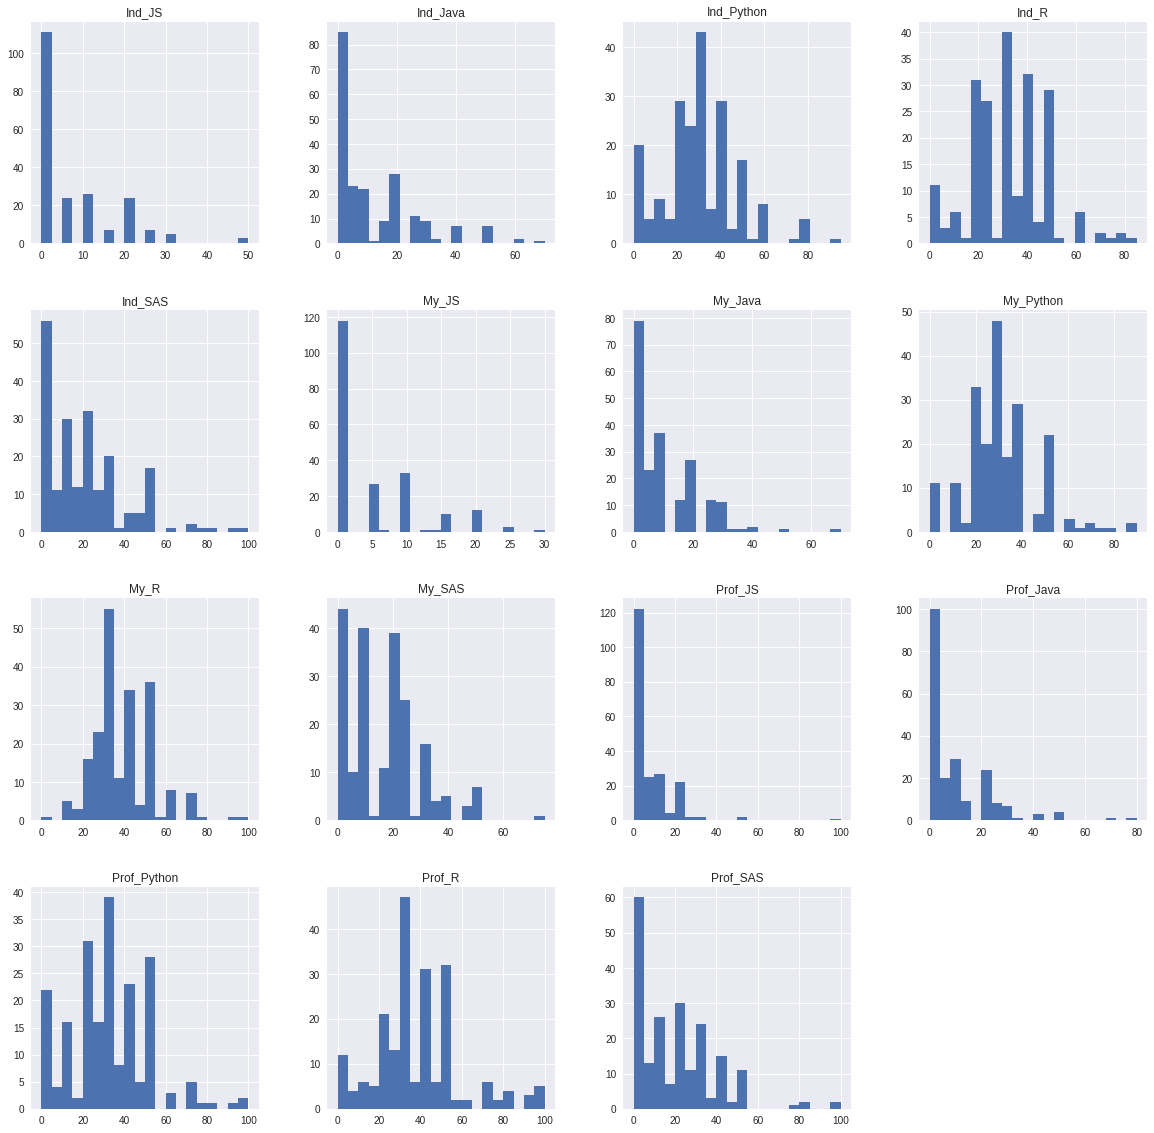

In [0]:
# Histograms of all fields
software_df.hist(bins=20, figsize=(20,20))

#### Python Course Interest

In [0]:
# Create pivot table to display average interest in 
# python course based on classes completed
py_int = pd.pivot_table(survey_df, values='Python_Course_Interest', 
                        index='Courses_Completed', aggfunc=np.mean)

py_int.reset_index(inplace=True)
py_int

,Courses_Completed,Python_Course_Interest
0,1.0,69.166667
1,2.0,74.200000
2,3.0,73.230769
3,4.0,86.461538
4,5.0,75.875000
5,6.0,70.000000
6,7.0,66.708333
7,8.0,81.800000
8,9.0,79.928571
9,10.0,67.950000


Text(0, 0.5, 'Average Interest (100 point scale)')

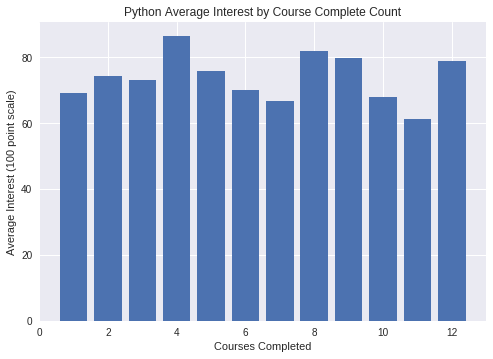

In [0]:
# Bar chart for interest by course complete count
plt.bar(py_int.iloc[:, 0], py_int.iloc[:, 1])
plt.title('Python Average Interest by Course Complete Count')
plt.xlabel('Courses Completed')
plt.ylabel('Average Interest (100 point scale)')

*Students who are 1/3 and 2/3 of the way through the program show the strongest interest in python*

#### Summary Stats for All Course Interest

In [0]:
survey_df.iloc[:, 15:19].describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


*We can see that the python course has the highest average interest of the 4 courses*

# Model Prep

### Import Scaling Functionality

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

### Example of One Hot Encoding a Categorical Variable

In [0]:
encoder = LabelBinarizer()
grad_dt = survey_df['Graduate_Date'].dropna()
grad_dt_one_hot = encoder.fit_transform(grad_dt)
grad_dt_one_hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Scaling Courses Completed

In [0]:
# Select Courses completed to transform
X = survey_df['Courses_Completed'].dropna()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Unscaled')

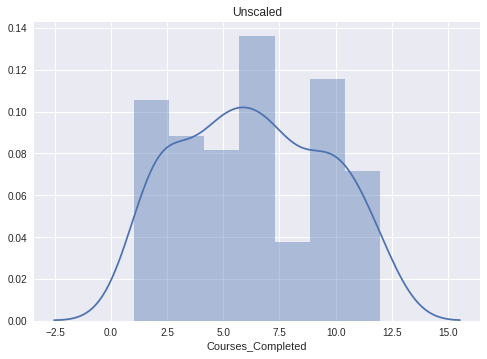

In [0]:
# Unscaled
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'StandardScaler')

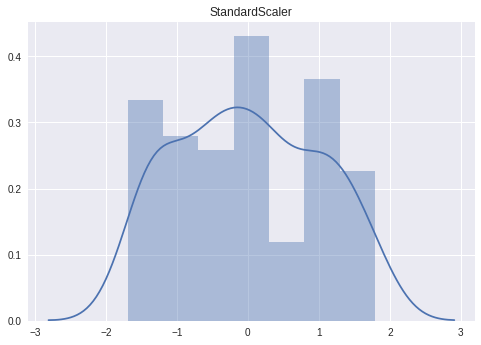

In [0]:
# Standard Scaler
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(
    X.values.reshape(-1,1))).set_title('StandardScaler')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'MinMaxScaler')

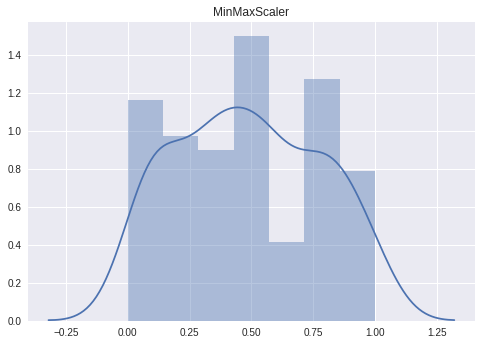

In [0]:
# MinMaxScaler
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(
    X.values.reshape(-1,1))).set_title('MinMaxScaler')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'NaturalLog')

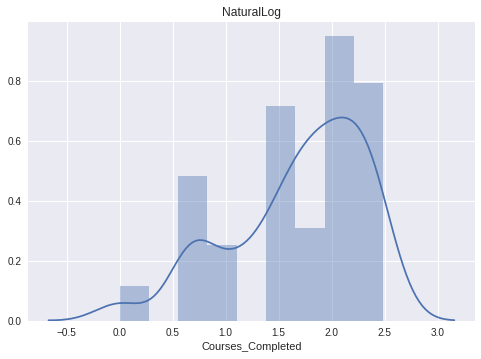

In [0]:
# Log Scale
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')

### Scaling Python Course Interest

In [0]:
# Python Course Interest Variable
pci = survey_df['Python_Course_Interest'].dropna()

In [0]:
# Perform transformations for easier plotting
pci_standard_scaled = StandardScaler().fit_transform(pci.values.reshape(-1,1))
pci_min_max_scaled = MinMaxScaler().fit_transform(pci.values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Unscaled')

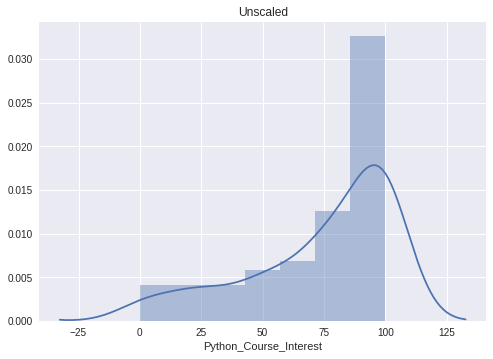

In [0]:
# Unscaled
fig, ax = plt.subplots()
sns.distplot(pci).set_title('Unscaled')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'MinMaxScaler')

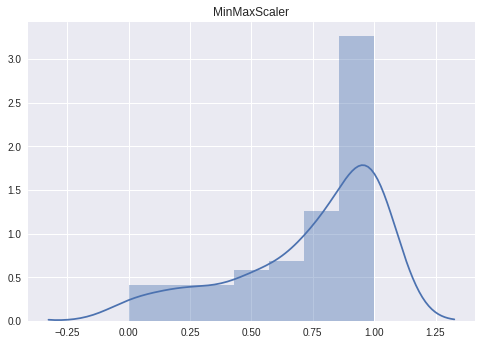

In [0]:
# MinMax Scaled
fig, ax = plt.subplots()
sns.distplot(pci_min_max_scaled).set_title('MinMaxScaler')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'StandardScaler')

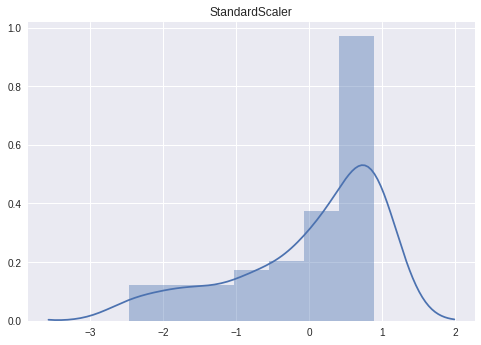

In [0]:
# Standard Scaler
fig, ax = plt.subplots()
sns.distplot(pci_standard_scaled).set_title('StandardScaler')

# Recommendations  


*   Administration should strongly consider implementing a python course based on survey results
*   Provide students with the option of R or Python for various courses. It appears that students prefer one or the other  
*  Based on historgrams of software preferences, Python and R have higher value to students as opposed to languages like Java and JS 

